# Parcial 2 práctico

## Previsión del uso de un sistema de bicicletas compartidas en la ciudad

Los sistemas de bicicletas compartidas son un medio de alquilar bicicletas en el que el proceso de obtención de la membresía, el alquiler y la devolución de la bicicleta se automatiza a través de una red de quioscos repartidos por la ciudad. Gracias a estos sistemas, los usuarios pueden alquilar una bicicleta en un lugar y devolverla en otro cuando lo necesiten. En la actualidad, hay más de 500 programas de bicicletas compartidas en todo el mundo.

Los datos generados por estos sistemas los hacen atractivos para los investigadores, ya que se registra explícitamente la duración del viaje, el lugar de salida, el lugar de llegada y el tiempo transcurrido. Los sistemas de bicicletas compartidas funcionan, por tanto, como una red de sensores que puede utilizarse para estudiar la movilidad en una ciudad. En este concurso, se pide a los participantes que combinen los patrones de uso histórico con los datos meteorológicos para prever la demanda de alquiler de bicicletas en el programa Capital Bikeshare de Washington, D.C.

Objetivo: Estimar una regresión utilizando los datos de Capital Bikeshare, teniendo en cuenta las siguientes variables:

* datetime - fecha horaria + timestamp  
* season -  
  * 1 = primavera
  * 2 = verano 
  * 3 = otoño 
  * 4 = invierno 
* holiday - si el día se considera festivo
* workingday - si el día no es ni fin de semana ni festivo
* weather - 
  * 1: Despejado, Pocas nubes, Parcialmente nublado, Parcialmente nublado 
  * 2: Niebla + Nublado, Niebla + Nubes dispersas, Niebla + Pocas nubes, Niebla 
  * 3: Nieve ligera, Lluvia ligera + Tormenta + Nubes dispersas, Lluvia ligera + Nubes dispersas 
  * 4: Lluvia intensa + Paletas de hielo + Tormenta eléctrica + Nieve, Nieve + Niebla 
* temp - temperatura en Celsius
* atemp - temperatura en Celsius
* humidity - humedad relativa
* windspeed - velocidad del viento
* casual - número de alquileres iniciados por usuarios no registrados
* registered - número de alquileres iniciados por usuarios registrados
* **total - número de alquileres totales** (variable a predecir)


In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/bikeshare.csv'
bikes = pd.read_csv(url, index_col='datetime', parse_dates=True)

bikes.rename(columns={'count':'total'}, inplace=True)

bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [2]:
bikes.shape

(10886, 11)

# Punto 1

Utilizando sklearn estima una regresión lineal teniendo en cuenta estas dos variables y prediga el porcentaje total de bicicletas cuando la temperatura es de 31 grados, regresion linal simple temperatura-Capital Bikeshare

In [18]:
#Regresion lineal simple: total - temp 

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression


In [54]:
###### CON LOS DATOS NORMALIZADOS:

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

#Normalizar los datos
#Se normaliza los datos de la variable respuesta ya que se quiere el resultado en porcentaje.

feature_cols = ['temp']                          
X = bikes[feature_cols]                          
y = bikes.total    

y_mean, y_std = Y.mean(), Y.std()
#X_mean, X_std = X.mean(), X.std()

y = (Y - y_mean)/ y_std
#X = (X - X_mean)/ X_std

#Modelo
linreg = LinearRegression()                                                        
linreg.fit(X, y)

#Predicciones
bikes['pred'] = linreg.predict(X) 

#Prediccion total de bicicletas cuando la temperatura es 31 grados
test = np.array(31)          
test = test.reshape(-1,1)   
linreg.predict(test)

#Interpretacion: 

array([0.54519382])

Interpretacion: Cuando la temperatura es de 31 Celsius, se espera que el porcentaje total de bicicletas aumente en un 54.51%

In [60]:
#### MODELO CON LOS DATOS SIN NOMALIZAR ###
feature_cols = ['temp']                          
X = bikes[feature_cols]                          
y = bikes.total   

linreg = LinearRegression()                                                        
linreg.fit(X, y)

bikes['pred'] = linreg.predict(X) #Predicciones

#Modelo escrito

linreg.intercept_ + linreg.coef_

#Prediccion total de bicicletas cuando la temperatura es 31 grados
test = np.array(31)          
test = test.reshape(-1,1)   
linreg.predict(test)

array([290.33296788])

Text(0, 0.5, 'número de alquileres totales')

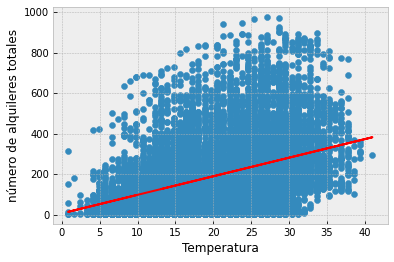

In [61]:
plt.scatter(bikes.temp, bikes.total)
plt.plot(bikes.temp, bikes.pred, color='red')
plt.xlabel('Temperatura')
plt.ylabel('número de alquileres totales')

# Punto 2

Evaluar el modelo con el $R^2$ y $RMSE$


In [62]:
from sklearn import metrics
import numpy as np

print('R2:', metrics.r2_score(bikes['total'], bikes['pred'])*100)
print('RMSE:', np.sqrt(metrics.mean_squared_error(bikes['total'], bikes['pred'])))

R2: 15.559367802794855
RMSE: 166.44886243326746


# Punto 3

Estime una regresión utilizando más características ['temp', 'season', 'weather', 'humidity'].

¿Cómo es el rendimiento en comparación con el uso de sólo la temperatura? Evalue en las metricas anteriormente calculadas.

In [63]:
from sklearn.linear_model import LinearRegression

clf1 = LinearRegression()
clf1.fit(bikes[['temp', 'season', 'weather', 'humidity']], bikes['total'])

y_pred = clf1.predict(bikes[['temp', 'season', 'weather', 'humidity']])

In [64]:
print('R2:', metrics.r2_score(bikes['total'], y_pred)*100)
print('RMSE:', np.sqrt(metrics.mean_squared_error(bikes['total'], y_pred)))

R2: 25.829758327282125
RMSE: 155.99832684186404


In [65]:
#A comparación con el uso de solo la temperatura, se observa que al añadir mas variables el modelo se ajusta mejor.
#esto es porque este ultimo modelo tiene un R2 mas alto y un RMSE menor.

# Punto 4

Dividir aleatoriamente los datos en entrenamiento y prueba, utilizando la semilla 30402 y la particición 70% para entrenamiento y 30% en test.

¿Cuál de los siguientes modelos es el mejor en el conjunto de test, teniendo en cuenta las anteriores metricas?
* ['temp', 'season', 'weather', 'humidity']
* ['temp', 'season', 'weather']
* ['temp', 'season', 'humidity']


In [77]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

In [74]:
#MODELO 1: CON ['temp', 'season', 'weather', 'humidity']

feature_cols = ['temp', 'season', 'weather', 'humidity']
X = bikes[feature_cols]
y = bikes['total']

# Train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30402)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)  

# Estimar el modelo #1: con variables ['temp', 'season', 'weather', 'humidity']

clf1_tt = LinearRegression()
clf1_tt.fit(X_train, y_train) 
y_pred_tt = clf1.predict(X_test)

print('MSE regresión lineal test:', metrics.mean_squared_error(y_test, y_pred_tt))
y_pred_tt = clf1.predict(X_train)
print('MSE regresión lineal train:', metrics.mean_squared_error(y_train, y_pred_tt))

(7620, 4) (3266, 4) (7620,) (3266,)
MSE regresión lineal test: 24857.79771097136
MSE regresión lineal train: 24111.607078557525


In [81]:
#MODELO 2: CON ['temp', 'season', 'weather']

feature_cols = ['temp', 'season', 'weather']
X = bikes[feature_cols]
y = bikes['total']

# Train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30402)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)  

# Estimar el modelo #1: con variables ['temp', 'season', 'weather', 'humidity']

modelo = LinearRegression()
modelo.fit(X_train, y_train) 
y_pred_tt = modelo.predict(X_test)

print('MSE regresión lineal test:', metrics.mean_squared_error(y_test, y_pred_tt))
y_pred_tt = modelo.predict(X_train)
print('MSE regresión lineal train:', metrics.mean_squared_error(y_train, y_pred_tt))

(7620, 3) (3266, 3) (7620,) (3266,)
MSE regresión lineal test: 27527.654469247784
MSE regresión lineal train: 27039.506942592783


In [82]:
#MODELO 3: CON ['temp', 'season', 'humidity']

feature_cols = ['temp', 'season', 'humidity']
X = bikes[feature_cols]
y = bikes['total']

# Train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30402)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)  

# Estimar el modelo #1: con variables ['temp', 'season', 'weather', 'humidity']

modelo3 = LinearRegression()
modelo3.fit(X_train, y_train) 
y_pred_tt = modelo3.predict(X_test)

print('MSE regresión lineal test:', metrics.mean_squared_error(y_test, y_pred_tt))
y_pred_tt = modelo3.predict(X_train)
print('MSE regresión lineal train:', metrics.mean_squared_error(y_train, y_pred_tt))

(7620, 3) (3266, 3) (7620,) (3266,)
MSE regresión lineal test: 24899.071390322504
MSE regresión lineal train: 24118.055803503703


In [ ]:
#El mejor modelo resulta ser el primero pues dio un menor MSE

# Punto 5

Responda ¿Cuándo se estrena la nueva adaptación de Dune?